In [1]:
import sys
sys.path.append('../SpectralMechanicsAnalysis')
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

In [2]:
def compute_trajectory(impulse_response, sampling_rate, duration, noise_power):
    """
    Compute the trajectory of an LTI system excited by white noise.

    Parameters:
    - impulse_response: array, the impulse response of the system.
    - sampling_rate: float, the sampling rate of the system.
    - duration: float, the duration of the simulation in seconds.
    - noise_power: float, the power of the white noise input.

    Returns:
    - t: array, time vector.
    - output: array, the output signal of the system.
    """
    # Time vector
    t = np.arange(0, duration, 1/sampling_rate)
    # Generate white noise
    noise = np.random.normal(0, np.sqrt(noise_power), size=len(t))
    # Compute the output signal by convolving the impulse response with the noise
    output = signal.convolve(noise, impulse_response, mode='same') / sampling_rate
    
    return t, output
def compute_psd_analytical(impulse_response, sampling_rate, noise_power):
    """
    Compute the analytical PSD of the output of an LTI system excited by white noise.

    Parameters:
    - impulse_response: array, the impulse response of the system.
    - sampling_rate: float, the sampling rate of the system.
    - noise_power: float, the power of the white noise input.

    Returns:
    - f: array, frequency vector.
    - psd: array, the analytical power spectral density of the output.
    """
    # Compute the frequency response of the system (Transfer function in frequency domain)
    freq, response = signal.freqz(impulse_response, worN=8000)
    # Convert frequency from rad/sample to Hz
    f = freq * sampling_rate / (2 * np.pi)
    # Compute the analytical PSD
    psd = np.abs(response) ** 2 * noise_power
    
    return f, psd

# Example of plotting the PSD
def plot_psd(f, psd):
    plt.figure(figsize=(10, 6))
    plt.plot(f, 10 * np.log10(psd), label='Analytical PSD')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectral Density (dB/Hz)')
    plt.title('Analytical Power Spectral Density')
    plt.legend()
    plt.grid(True)
    plt.show()

In [5]:
def powerspectrum(trajectory, dt, k_max=None):
    # Compute the FFT of the trajectory
    trajectory_fft = np.fft.fft(trajectory)
    if k_max != None:
        k_max = min(k_max, len(trajectory) // 2)
    else:
        k_max = len(trajectory) // 2

    f_ks = np.arange(1, k_max+1) /(len(trajectory) * dt)

    frequncy_indeces = np.arange(1, k_max+1)
    
    # Only consider up to k_max frequencies
    truncated_fft = trajectory_fft[frequncy_indeces]
    
    # Compute the power spectrum
    power_spectrum = np.abs(truncated_fft)**2 /len(trajectory)

        
    return f_ks, power_spectrum

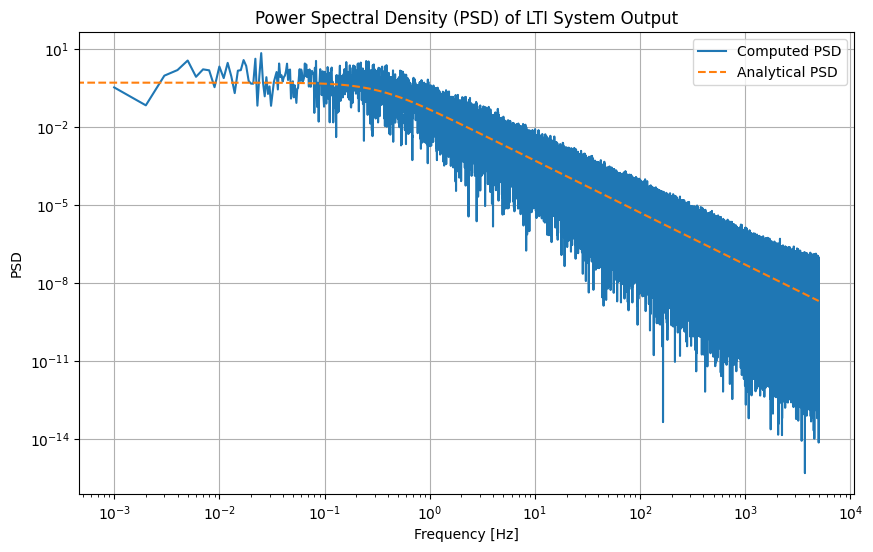

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_trajectory(dt, T, tau):
    """
    Simulate a trajectory of an LTI system (a first-order low-pass filter)
    excited by white noise.
    """
    N = int(T / dt)
    time = np.arange(N) * dt
    white_noise = np.random.normal(0, 1, N)
    # Simulate the system response using the Euler method for simplicity
    trajectory = np.zeros(N)
    alpha = dt / tau
    for i in range(1, N):
        trajectory[i] = (1 - alpha) * trajectory[i-1] + alpha * white_noise[i]
    return time, trajectory

def analytical_psd(f, tau, N0):
    """
    Compute the analytical PSD of the output of the LTI system.
    """
    return N0 / (2 * (1 + (2 * np.pi * f * tau)**2))

# Parameters
dt = .0001 # time step
T = 1000.0   # total time
tau = 0.5  # time constant of the LTI system
N0 = 1     # noise power spectral density

# Simulate the trajectory
time, trajectory = simulate_trajectory(dt, T, tau)

# Compute the PSD using the powerspectrum function
f_ks, power_spectrum = powerspectrum(trajectory, dt)

# Compute the analytical PSD
f_analytical = np.linspace(0, max(f_ks), len(f_ks))
analytical_psd_values = analytical_psd(f_analytical, tau, N0)

# Plotting
plt.figure(figsize=(10, 6))
plt.loglog(f_ks, power_spectrum, label='Computed PSD')
plt.loglog(f_analytical, analytical_psd_values, label='Analytical PSD', linestyle='--')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD')
plt.legend()
plt.title('Power Spectral Density (PSD) of LTI System Output')
plt.grid(True)
plt.show()
